# Integración de condiciones de frontera de Neumman

In [1]:
%matplotlib widget

In [2]:
from sympy import *

In [3]:
init_session()

IPython console for SymPy 1.12 (Python 3.11.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [10]:
r, q, L = symbols("r q L")

Para la aplicación de condiciones de frontera de Neumann no homogéneas es
necesario integrar los flujos para obtener los valores nodales correspondientes.
En el caso mecánico pasaríamos de tener tracciones (proyección de esfuerzos)
a fuerzas nodales.

Supongamos que estamos en 2D y que las aristas tienen 3 nodos. Lo que
implicaría las siguientes funciones de forma en 1D sobre el dominio
canónico $r \in [-1, 1]$.

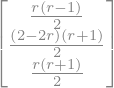

In [5]:
H = S(1)/2 * Matrix([
    (r - 1) * r,
    -2*(r - 1) * (r + 1),
    (r + 1) * r])
H

In [6]:
display(H.subs(r, -1))
display(H.subs(r, 0))
display(H.subs(r, 1))

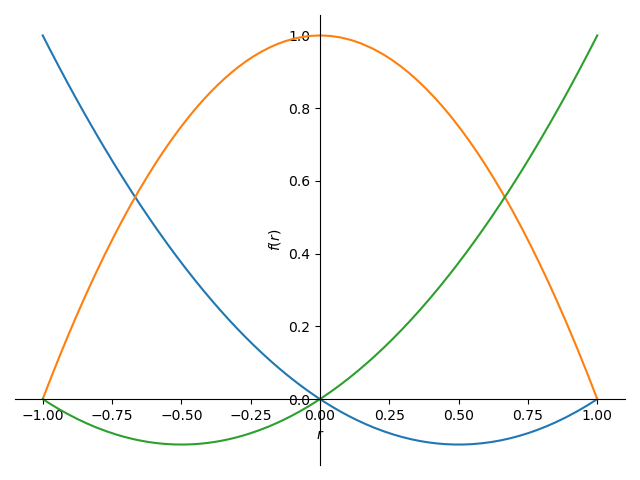

In [7]:
plot(*H, (r, -1, 1))

Para obtener los valores nodales tendríamos que integrar

$$\mathbf{f} = \int\limits_{-1}^{1} q(\mathbf{x}) \mathbf{H}(r) |J| \mathrm{d}r\, ,$$

sabemos que $|J| = L/2$ donde $L$ es la longitud del elemento. Si asumimos un valor
de $q$ constante sobre la arista, tendríamos

$$\mathbf{f} = \frac{q L}{2}\int\limits_{-1}^{1} \mathbf{H}(r) \mathrm{d}r\, .$$

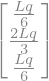

In [11]:
f = q*L/2 * H.integrate((r, -1, 1))
f

Con lo que conluimos que el nodo del centro debería tener un valor del doble 
que los de las esquinas.